In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#POINTS POR MINUTO -> RATIO PARA USAR QUANDO FAZER MODELOS -> Inicio

In [6]:
import sys
print(sys.executable)
#PARA RODAREM A REGRESSAO LINEAR TÊM DE TER O SKLEARN INSTALADO NO MESMO AMBIENTE QUE O JUPYTER


/home/pjoca/Secretária/Universidade/4ºano/1ºsemestre/AC/ac-data-mining-project/venv/bin/python


In [7]:
players_df = pd.read_csv("data/players.csv")
players_teams_df = pd.read_csv("data/players_teams.csv")
teams_df = pd.read_csv("data/teams.csv")
teams_post_df = pd.read_csv("data/teams_post.csv")
coaches_df = pd.read_csv("data/coaches.csv")
series_post_df = pd.read_csv("data/series_post.csv")
awards_df = pd.read_csv("data/awards_players.csv")

Total de jogadoras com dados válidos: 774
📈 Modelo 1 - Peso = -82.09 + 3.47 × Altura
📈 Modelo 2 - Altura = 53.99 + 0.11 × Peso
✅ Preenchidos 39 pesos em falta
✅ Preenchidas 1 alturas em falta
🚫 Zeros restantes em 'height': 80
🚫 Zeros restantes em 'weight': 80

📊 Estatísticas descritivas (em cm e kg):
        height_cm   weight_kg
count  893.000000  893.000000
mean   166.567154   69.327510
std     52.981174   24.032207
min      0.000000    0.000000
25%    172.720000   65.770840
50%    182.880000   74.842680
75%    190.500000   81.646560
max    203.200000  115.212368


/tmp/ipykernel_6520/1719387593.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[140.27383426 178.49201498 181.96639505 175.01763492 140.27383426
 147.22259439 178.49201498 181.96639505 164.59449472 178.49201498
 150.69697446 171.54325485 171.54325485 161.12011466 161.12011466
 178.49201498 157.64573459 175.01763492 164.59449472 161.12011466
 168.06887479 181.96639505 185.44077511 171.54325485 181.96639505
 175.01763492 181.96639505 171.54325485 168.06887479 171.54325485
 161.12011466 175.01763492 185.44077511 168.06887479 168.06887479
 168.06887479 178.49201498 168.06887479 181.96639505]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  players_filled.loc[mask_missing_weight, 'weight'] = model_w.predict(


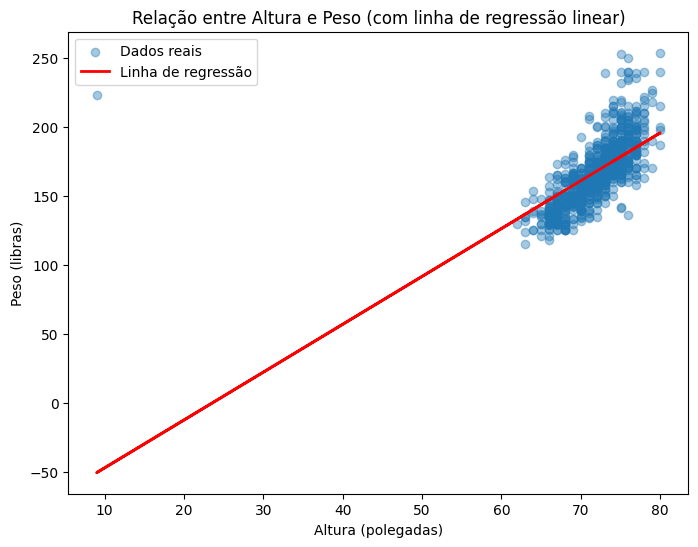

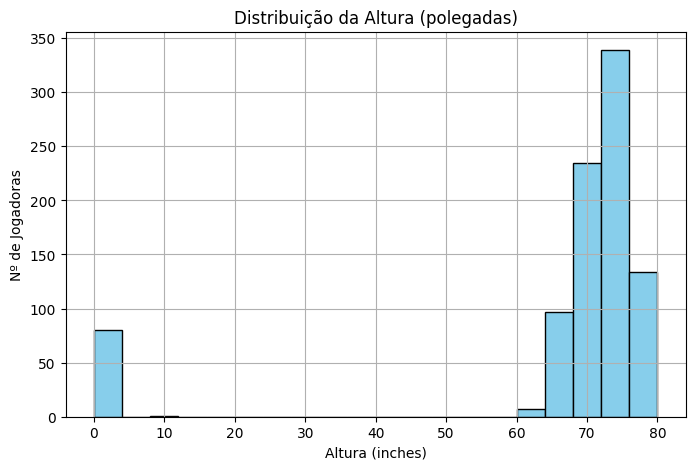

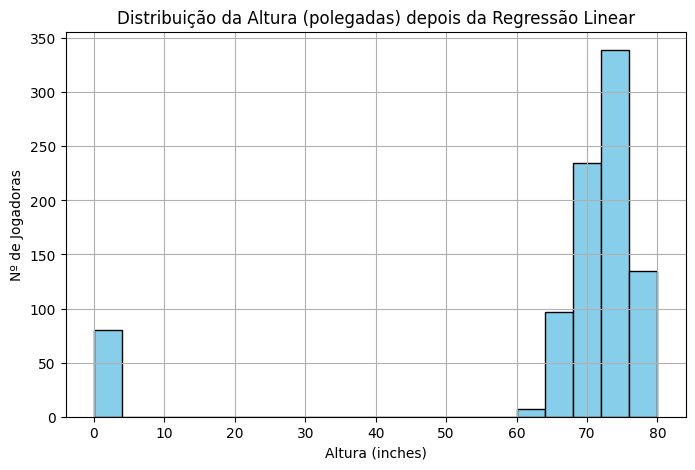

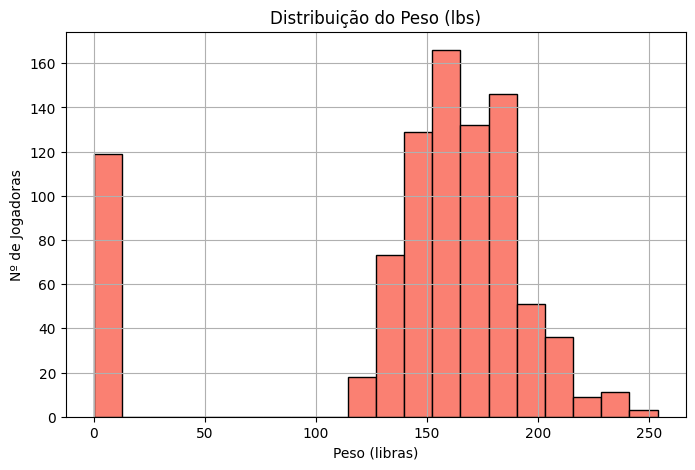

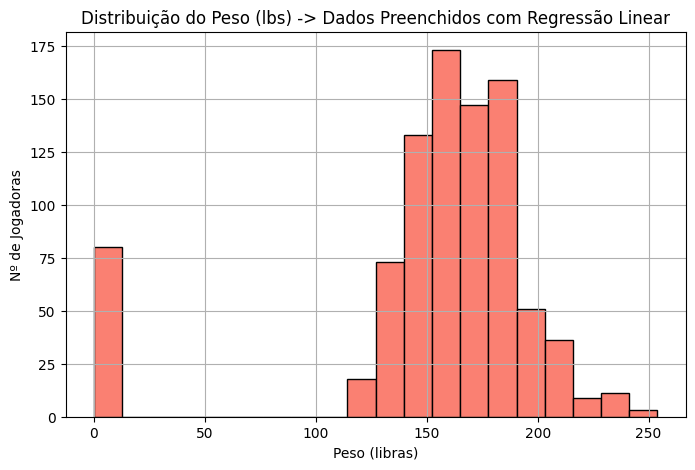

In [8]:
# ================================================================
# 🔍 Regressão Linear entre Altura e Peso (para preencher valores em falta)
# ================================================================
# Objetivo: alguns jogadores têm altura ou peso igual a 0 — ou seja, valores ausentes.
# Vamos usar regressão linear (altura ↔ peso) para estimar e preencher esses valores.
# ================================================================

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1️⃣ Filtrar apenas jogadoras com dados válidos
# ------------------------------
# Mantemos apenas linhas onde tanto 'height' (altura) como 'weight' (peso)
# são maiores que zero — estas são as observações confiáveis.
valid = players_df[(players_df['height'] > 0) & (players_df['weight'] > 0)].copy()

print(f"Total de jogadoras com dados válidos: {len(valid)}")

# ------------------------------
# 2️⃣ Copiar o DataFrame original
# ------------------------------
# Criamos uma cópia do dataset completo onde faremos as substituições.
players_filled = players_df.copy()

# ------------------------------
# 3️⃣ Criar dois modelos de regressão linear
# ------------------------------
# Modelo 1: predição de peso (lbs) a partir da altura (inches)
# Modelo 2: predição de altura (inches) a partir do peso (lbs)
model_w = LinearRegression()
model_h = LinearRegression()

# Treinar os modelos com os dados válidos
model_w.fit(valid[['height']], valid['weight'])
model_h.fit(valid[['weight']], valid['height'])

print(f"📈 Modelo 1 - Peso = {model_w.intercept_:.2f} + {model_w.coef_[0]:.2f} × Altura")
print(f"📈 Modelo 2 - Altura = {model_h.intercept_:.2f} + {model_h.coef_[0]:.2f} × Peso")

# ------------------------------
# 4️⃣ Preencher valores de PESO em falta (quando altura existe)
# ------------------------------
mask_missing_weight = (players_filled['height'] > 0) & (players_filled['weight'] == 0)

if mask_missing_weight.sum() > 0:
    players_filled.loc[mask_missing_weight, 'weight'] = model_w.predict(
        players_filled.loc[mask_missing_weight, ['height']]
    )
    print(f"✅ Preenchidos {mask_missing_weight.sum()} pesos em falta")
else:
    print("ℹ️ Nenhum peso em falta para preencher.")

# ------------------------------
# 5️⃣ Preencher valores de ALTURA em falta (quando peso existe)
# ------------------------------
#ATENÇAO AQUI PQ COLOQUEI MENOS QUE 10 POIS NINGUEM TEM ALTURA ABAIXO DE 10 POLEGADAS
mask_missing_height = (players_filled['height'] < 20) & (players_filled['weight'] > 0)

if mask_missing_height.sum() > 0:
    players_filled.loc[mask_missing_height, 'height'] = model_h.predict(
        players_filled.loc[mask_missing_height, ['weight']]
    )
    print(f"✅ Preenchidas {mask_missing_height.sum()} alturas em falta")
else:
    print("ℹ️ Nenhuma altura em falta para preencher.")

# ------------------------------
# 6️⃣ Contar quantos zeros ainda restam (após a imputação)
# ------------------------------
missing_height = (players_filled['height'] == 0).sum()
missing_weight = (players_filled['weight'] == 0).sum()

print(f"🚫 Zeros restantes em 'height': {missing_height}")
print(f"🚫 Zeros restantes em 'weight': {missing_weight}")

# ------------------------------
# 7️⃣ Converter para unidades métricas (cm e kg)
# ------------------------------
# Útil para análises mais intuitivas e comparações internacionais
players_filled['height_cm'] = players_filled['height'] * 2.54
players_filled['weight_kg'] = players_filled['weight'] * 0.453592

print("\n📊 Estatísticas descritivas (em cm e kg):")
print(players_filled[['height_cm','weight_kg']].describe())

# ------------------------------
# 8️⃣ Visualização da relação altura ↔ peso
# ------------------------------
plt.figure(figsize=(8,6))
plt.scatter(valid['height'], valid['weight'], alpha=0.4, label="Dados reais")
plt.plot(valid['height'], model_w.predict(valid[['height']]),
         color='red', linewidth=2, label="Linha de regressão")
plt.title("Relação entre Altura e Peso (com linha de regressão linear)")
plt.xlabel("Altura (polegadas)")
plt.ylabel("Peso (libras)")
plt.legend()
plt.show()

#O Q É SUPOSTO FAZER COM PESO E ALTURA = 0? -> ELIMINAR ESSAS LINHAS???

plt.figure(figsize=(8,5))
players_df['height'].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição da Altura (polegadas)")
plt.xlabel("Altura (inches)")
plt.ylabel("Nº de Jogadoras")
plt.show()


#aLTURA DEPOIS DA REGRESSAO LINEAR
plt.figure(figsize=(8,5))
players_filled['height'].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição da Altura (polegadas) depois da Regressão Linear")
plt.xlabel("Altura (inches)")
plt.ylabel("Nº de Jogadoras")
plt.show()

plt.figure(figsize=(8,5))
players_df['weight'].hist(bins=20, color="salmon", edgecolor="black")
plt.title("Distribuição do Peso (lbs)")
plt.xlabel("Peso (libras)")
plt.ylabel("Nº de Jogadoras")
plt.show()

#PESO DEPOIS DA REGRESSAO LINEAR
plt.figure(figsize=(8,5))
players_filled['weight'].hist(bins=20, color="salmon", edgecolor="black")
plt.title("Distribuição do Peso (lbs) -> Dados Preenchidos com Regressão Linear")
plt.xlabel("Peso (libras)")
plt.ylabel("Nº de Jogadoras")
plt.show()


